In [1]:
import pandas as pd
import re
import string
import numpy as np 
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
wordnet_lemmatizer = WordNetLemmatizer()
#from spacy.lang.en import English
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

#set(stopwords.words("english"))




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sowjanya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sowjanya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sowjanya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
pd.set_option('display.max_rows',None)

In [3]:
train=pd.read_csv(r'..\Dataset\newtraindata1.csv')
train=train.replace(np.nan, '',regex=True)
test=pd.read_csv(r'..\Dataset\newtestdata1.csv')
test=test.replace(np.nan, '',regex=True)
punctuaions=set(string.punctuation)




In [4]:
#  input text extraction
X_text_train=train['title'].map(str)+' '+train['description'].map(str)
X_text_test=test['title'].map(str)+' '+test['description'].map(str)
#output
y_text_train=train['categories__2'].values
y_text_test=test['categories__2'].values
# Converting to lower case
y_text_train=[x.lower() for x in y_text_train ]
y_text_test=[x.lower() for x in y_text_test ]




In [5]:
def leafnode_extraction(data_frame):
    leafnode=[]
    if 'categories__2' not in data_frame.columns:
        return leafnode
    for index,col in data_frame.iterrows():
        if len(col['categories__6'])!=0:
            leafnode.append(col['categories__6'])
        elif len(col['categories__5'])!=0:
            leafnode.append(col['categories__5'])
        elif len(col['categories__4'])!=0:
            leafnode.append(col['categories__4'])
        elif len(col['categories__3'])!=0:
            leafnode.append(col['categories__3'])
        else:
            leafnode.append(col['categories__2'])
    return leafnode

In [6]:
#stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", ':', ';', '(', ')', '[', ']', '{', '}','&','nan'])
stemmer = SnowballStemmer('english')



In [7]:
#Preprocess the text in training and testing dataset stemming and lemmatizing
stemmed_train = []
lemmatized_train =[]
lemmatized_test=[]

for doc in X_text_train:
    tokens = word_tokenize(doc)
    tokens=[w.lower() for w in tokens if w.isalpha()]
    filtered = [word for word in tokens if word not in stop_words]
    stemmed = [stemmer.stem(word) for word in filtered]
    lemmatized=[wordnet_lemmatizer.lemmatize(word) for word in filtered]
    stemmed_train.append(stemmed)
    lemmatized_train.append(lemmatized)
stemmed_test = []
for doc in X_text_test:
    tokens = word_tokenize(doc)
    tokens=[w.lower() for w in tokens if w.isalpha()]
    filtered = [word for word in tokens if word not in stop_words]
    stemmed = [stemmer.stem(word) for word in filtered]
    lemmatized=[wordnet_lemmatizer.lemmatize(word) for word in filtered]
    stemmed_test.append(stemmed)
    lemmatized_test.append(lemmatized)
print(X_text_train[1])
print(stemmed_train[1])
print(lemmatized_train[1])


    


Polaroid Pbm2200 PC / Gaming Stereo Headphones With Microphone &amp; In-line Volume Use these high quality headphones for internet chatting and enjoy the comfort and ease of the headphones with the microphone and in-line volume control. Works with: Skype msn AIM YAHOO! Windows Live
['polaroid', 'pc', 'game', 'stereo', 'headphon', 'microphon', 'amp', 'volum', 'use', 'high', 'qualiti', 'headphon', 'internet', 'chat', 'enjoy', 'comfort', 'eas', 'headphon', 'microphon', 'volum', 'control', 'work', 'skype', 'msn', 'aim', 'yahoo', 'window', 'live']
['polaroid', 'pc', 'gaming', 'stereo', 'headphone', 'microphone', 'amp', 'volume', 'use', 'high', 'quality', 'headphone', 'internet', 'chatting', 'enjoy', 'comfort', 'ease', 'headphone', 'microphone', 'volume', 'control', 'work', 'skype', 'msn', 'aim', 'yahoo', 'window', 'live']


In [8]:
#X_text_train[1]

In [9]:
# Appending stemmed and lemmatized text to test and train dataframe
train['stemmed_text']=stemmed_train
test['stemmed_text']=stemmed_test
train['lemmatized_text']=lemmatized_train
test['lemmatized_text']=lemmatized_test


In [10]:
train.head()

,title,description,imUrl,price,brand,categories__1,categories__2,categories__3,categories__4,categories__5,categories__6,stemmed_text,lemmatized_text
0,CLIKR-5 Time Warner Cable Remote Control UR5U-...,The CLIKR-5 UR5U-8780L remote control is desig...,http://ecx.images-amazon.com/images/I/41HaAhbv...,23.36,,Electronics,Accessories & Supplies,Audio & Video Accessories,Remote Controls,TV Remote Controls,,"[time, warner, cabl, remot, control, remot, co...","[time, warner, cable, remote, control, remote,..."
1,Polaroid Pbm2200 PC / Gaming Stereo Headphones...,Use these high quality headphones for internet...,http://ecx.images-amazon.com/images/I/21rEirnd...,13.95,,Electronics,Accessories & Supplies,Audio & Video Accessories,Headphones,,,"[polaroid, pc, game, stereo, headphon, microph...","[polaroid, pc, gaming, stereo, headphone, micr..."
2,Barnes &amp; Noble NOOK Power Kit in Carbon BN...,The Barnes &amp;amp; Noble BNADPN31 Power Kit ...,http://ecx.images-amazon.com/images/I/41kQsHT8...,32.1,Barnes &amp; Noble,Electronics,eBook Readers & Accessories,Power Adapters,,,,"[barn, amp, nobl, nook, power, kit, carbon, ba...","[barnes, amp, noble, nook, power, kit, carbon,..."
3,Jonathan Adler Punctuation Cover in Black,"NOOK cover, designed by Jonathon Adler.\nFits ...",http://ecx.images-amazon.com/images/I/41CqeMM0...,78.83,,Electronics,eBook Readers & Accessories,Skins,,,,"[jonathan, adler, punctuat, cover, black, nook...","[jonathan, adler, punctuation, cover, black, n..."
4,Barnes &amp; Noble 7 & quot; Lautner Chocolate...,Keep your tablet safe with this Barnes &amp; N...,http://ecx.images-amazon.com/images/I/31KkpByX...,15.55,,Electronics,eBook Readers & Accessories,Covers,,,,"[barn, amp, nobl, quot, lautner, chocol, nook,...","[barnes, amp, noble, quot, lautner, chocolate,..."


In [11]:
# Converting list to string format
row_lst = []
row_lst1 =[]
for lst in train.loc[:,'stemmed_text']:
    text = ''
    for word in lst:
        text = text + ' ' + word
    row_lst.append(text)
for lst in train.loc[:,'lemmatized_text']:
    text = ''
    for word in lst:
        text = text + ' ' + word
    row_lst1.append(text)

train['final_stemmed_string'] = row_lst
train['final_stemmed_string'] = train['final_stemmed_string'].str.strip()
train['final_lemmatized_string']=row_lst1
train['final_lemmatized_string']=train['final_lemmatized_string'].str.strip()
#train.drop('final_stemmed_text',axis=1,inplace=True)
#train.head()

In [12]:

row_lst = []
row_lst1 =[]
for lst in test.loc[:,'stemmed_text']:
    text = ''
    for word in lst:
        text = text + ' ' + word
    row_lst.append(text)
for lst in test.loc[:,'lemmatized_text']:
    text = ''
    for word in lst:
        text = text + ' ' + word
    row_lst1.append(text)

test['final_stemmed_string'] = row_lst
test['final_stemmed_string'] = test['final_stemmed_string'].str.strip()
test['final_lemmatized_string']=row_lst1
test['final_lemmatized_string']=test['final_lemmatized_string'].str.strip()
test.head()

,title,description,imUrl,price,brand,categories__1,categories__2,categories__3,categories__4,categories__5,categories__6,stemmed_text,lemmatized_text,final_stemmed_string,final_lemmatized_string
0,Panasonic SC-AK29 Compact Stereo System (Disco...,"Equipped with a five-CD changer, Panasonic's S...",http://ecx.images-amazon.com/images/I/41QGRQSQ...,134.5,,Electronics,Home Audio,Compact Stereos,,,,"[panason, compact, stereo, system, discontinu,...","[panasonic, compact, stereo, system, discontin...",panason compact stereo system discontinu manuf...,panasonic compact stereo system discontinued m...
1,JVC MXJ200 Compact Stereo System (Discontinued...,"JVC's MX-J200 compact stereo may be small, but...",http://ecx.images-amazon.com/images/I/41W6F65V...,134.5,,Electronics,Home Audio,Compact Stereos,,,,"[jvc, compact, stereo, system, discontinu, man...","[jvc, compact, stereo, system, discontinued, m...",jvc compact stereo system discontinu manufactu...,jvc compact stereo system discontinued manufac...
2,Sennheiser RS4-9 On-Ear Wireless Headphone,Sennheiser's RS4-9 wireless headphones consist...,http://g-ecx.images-amazon.com/images/G/01/x-s...,134.5,,Electronics,Accessories & Supplies,Audio & Video Accessories,Headphones,,,"[sennheis, wireless, headphon, sennheis, wirel...","[sennheiser, wireless, headphone, sennheiser, ...",sennheis wireless headphon sennheis wireless h...,sennheiser wireless headphone sennheiser wirel...
3,Pioneer VSX-D309 Audio/Video Receiver (Discont...,"With built-in Dolby Digital, DTS, and Dolby Pr...",http://ecx.images-amazon.com/images/I/41JTX248...,134.5,,Electronics,Home Audio,Stereo Components,Receivers & Amplifiers,Component Receivers,,"[pioneer, receiv, discontinu, manufactur, dolb...","[pioneer, receiver, discontinued, manufacturer...",pioneer receiv discontinu manufactur dolbi dig...,pioneer receiver discontinued manufacturer dol...
4,Pioneer VSX-108 Audio/Video Receiver (Disconti...,With 50 watts per channel and surround conveni...,http://ecx.images-amazon.com/images/I/41AJK34P...,134.5,,Electronics,Home Audio,Stereo Components,Receivers & Amplifiers,Component Receivers,,"[pioneer, receiv, discontinu, manufactur, watt...","[pioneer, receiver, discontinued, manufacturer...",pioneer receiv discontinu manufactur watt per ...,pioneer receiver discontinued manufacturer wat...


In [13]:
count_vect = CountVectorizer(max_features=5000)
count_vect.fit(train['final_lemmatized_string'])

X_train_counts = count_vect.transform(train['final_lemmatized_string'])
X_new_counts = count_vect.transform(test['final_lemmatized_string'])
print(X_train_counts.shape)
print(X_new_counts.shape)
features=count_vect.get_feature_names_out()
print(count_vect.vocabulary_)
#print(X_train_counts)
#df=pd.DataFrame(data=X_train_counts.toarray(),columns=features)
#df.head()


(4065, 5000)
(2169, 5000)
{'time': 4480, 'warner': 4825, 'cable': 557, 'remote': 3619, 'control': 902, 'designed': 1094, 'operate': 2987, 'pioneer': 3197, 'micro': 2683, 'samsung': 3788, 'motorola': 2780, 'digital': 1136, 'set': 3906, 'top': 4505, 'plus': 3241, 'majority': 2571, 'tv': 4613, 'vcr': 4729, 'dvd': 1272, 'aux': 305, 'equipment': 1427, 'market': 2600, 'box': 467, 'television': 4419, 'player': 3226, 'audio': 280, 'medium': 2647, 'pc': 3115, 'etc': 1446, 'contact': 886, 'information': 2151, 'let': 2417, 'need': 2854, 'detail': 1106, 'interactive': 2202, 'tutorial': 4612, 'english': 1387, 'spanish': 4115, 'programming': 3394, 'instruction': 2181, 'code': 751, 'offer': 2960, 'complete': 819, 'hd': 1935, 'dvr': 1274, 'factory': 1554, 'programmed': 3393, 'scientific': 3820, 'addition': 65, 'also': 141, 'auxiliary': 306, 'receiver': 3538, 'home': 1995, 'theater': 4440, 'system': 4369, 'feature': 1590, 'fully': 1764, 'backlit': 336, 'keypad': 2318, 'benefit': 397, 'compliant': 823, 

In [14]:
tfidf_vect=TfidfVectorizer(max_features=5000)
tfidf_vect.fit(train['final_lemmatized_string'])
#print(train['final_lemmatized_string'].append(test['final_lemmatized_string'])[7489:])



TfidfVectorizer(max_features=5000)

In [15]:

X_train_tfidf = tfidf_vect.transform(train['final_lemmatized_string'])
X_new_tfidf = tfidf_vect.transform(test['final_lemmatized_string'])
X_train_tfidf.shape
#X_new_tfidf.shape
#print(X_train_tfidf[0])


(4065, 5000)

In [16]:
#Naive Bayes
clf = MultinomialNB().fit(X_train_tfidf,y_text_train)
clf2=MultinomialNB().fit(X_train_counts,y_text_train)


In [17]:

predicted = clf.predict(X_new_tfidf)
predicted2 = clf2.predict(X_new_counts)

for category in predicted:
    print (category)




portable audio & video
home audio
accessories & supplies
home audio
home audio
portable audio & video
accessories & supplies
home audio
home audio
home audio
home audio
home audio
computers & accessories
portable audio & video
home audio
portable audio & video
computers & accessories
computers & accessories
home audio
portable audio & video
camera & photo
camera & photo
computers & accessories
camera & photo
camera & photo
camera & photo
camera & photo
camera & photo
computers & accessories
computers & accessories
camera & photo
computers & accessories
computers & accessories
camera & photo
camera & photo
camera & photo
computers & accessories
computers & accessories
computers & accessories
computers & accessories
computers & accessories
computers & accessories
computers & accessories
computers & accessories
computers & accessories
computers & accessories
computers & accessories
computers & accessories
accessories & supplies
camera & photo
accessories & supplies
accessories & supplies


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

print('accuracy of naive Bayes tfidf=',accuracy_score(predicted,y_text_test)*100)
print(" Accuracy of naive Bayescount freq -> ",accuracy_score(predicted2,y_text_test)*100)
# Calculate precision
precision = precision_score(y_text_test, predicted, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_text_test, predicted, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_text_test, predicted, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("F1 Score:", f1)


accuracy of naive Bayes tfidf= 86.26094974642693
 Accuracy of naive Bayescount freq ->  84.23236514522821
Precision: 0.8617514928323924
Recall: 0.8626094974642693
F1 Score: 0.8533298133622866


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:

#SVM
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train_tfidf,y_text_train)
SVM2 = svm.SVC(kernel='linear')
SVM2.fit(X_train_counts,y_text_train)



SVC(kernel='linear')

In [24]:
predictions_SVM = SVM.predict(X_new_tfidf)
# Assigning svm predicted categories to test data
test['pcategories__2']=predictions_SVM
predictions_SVM2 = SVM2.predict(X_new_counts)



In [25]:
print("SVM Accuracy Score tfidf -> ",accuracy_score(predictions_SVM,y_text_test)*100)
print("SVM Accuracy Score countfreq -> ",accuracy_score(predictions_SVM2,y_text_test)*100)

# Calculate precision
precision = precision_score(y_text_test, predictions_SVM, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_text_test, predictions_SVM, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_text_test, predictions_SVM, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("F1 Score:", f1)

SVM Accuracy Score tfidf ->  91.60903642231443
SVM Accuracy Score countfreq ->  86.90640848317197
Precision: 0.9142331406969929
Recall: 0.9160903642231443
F1 Score: 0.9148734548330232


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


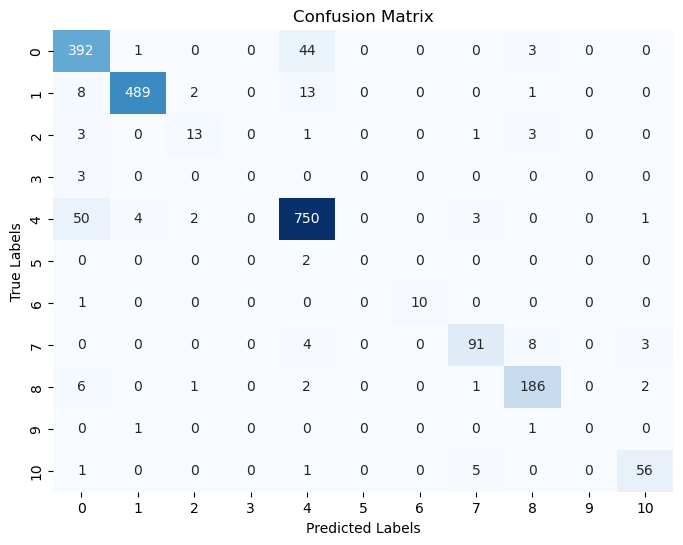

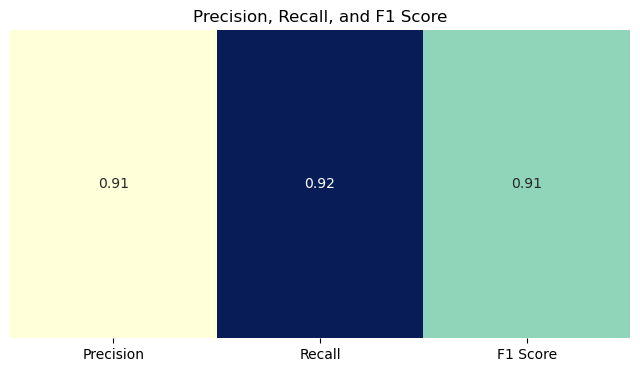

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
# Create confusion matrix
conf_matrix = confusion_matrix(y_text_test, predictions_SVM)

# Plot heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot heatmap for precision, recall, and F1 score
data = [[precision, recall, f1]]
metrics = ['Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(8, 4))
sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=metrics, yticklabels=False, cbar=False)
plt.title('Precision, Recall, and F1 Score')
plt.show()

In [26]:
for category in predictions_SVM :
    print(category)

home audio
home audio
accessories & supplies
television & video
home audio
home audio
accessories & supplies
home audio
home audio
home audio
home audio
home audio
computers & accessories
television & video
home audio
television & video
accessories & supplies
portable audio & video
home audio
portable audio & video
camera & photo
camera & photo
computers & accessories
camera & photo
camera & photo
camera & photo
camera & photo
camera & photo
computers & accessories
computers & accessories
camera & photo
computers & accessories
computers & accessories
camera & photo
camera & photo
camera & photo
computers & accessories
computers & accessories
computers & accessories
computers & accessories
computers & accessories
computers & accessories
portable audio & video
computers & accessories
computers & accessories
computers & accessories
computers & accessories
computers & accessories
accessories & supplies
camera & photo
accessories & supplies
accessories & supplies
accessories & supplies
acce

In [31]:
#knn
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_tfidf,y_text_train)
y_knn_pred = knn.predict(X_new_tfidf)
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_counts,y_text_train)
y_knn_pred2 = knn2.predict(X_new_counts)








In [33]:
print("Accuracy of knn tfidf:",accuracy_score(y_text_test, y_knn_pred)*100)
print("Accuracy of knn countfreq:",accuracy_score(y_text_test, y_knn_pred2)*100)
# Calculate precision
precision = precision_score(y_text_test, y_knn_pred, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_text_test, y_knn_pred, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_text_test, y_knn_pred, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("F1 Score:", f1)

#random forest

ranf=RandomForestClassifier(n_estimators=10)
#Train the model using the training sets y_pred=clf.predict(X_test)
ranf.fit(X_train_tfidf,y_text_train)
y_rf_pred=ranf.predict(X_new_tfidf)

ranf2=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
ranf2.fit(X_train_counts,y_text_train)
y_rf_pred2=ranf2.predict(X_new_counts)



Accuracy of knn tfidf: 90.41032733978793
Accuracy of knn countfreq: 81.005071461503
Precision: 0.9033293324493348
Recall: 0.9041032733978792
F1 Score: 0.9031622947592197


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
print("Accuracy of random forest tfidf:",accuracy_score(y_text_test, y_rf_pred)*100)
print("Accuracy of random forest countfrq:",accuracy_score(y_text_test, y_rf_pred2)*100)
# Calculate precision
precision = precision_score(y_text_test, y_rf_pred, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_text_test, y_rf_pred, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_text_test, y_rf_pred, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("F1 Score:", f1)


Accuracy of random forest tfidf: 83.77132319041033
Accuracy of random forest countfrq: 88.28953434762563
Precision: 0.837453035165819
Recall: 0.8377132319041033
F1 Score: 0.8346758095316588


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
leafnode=leafnode_extraction(train)
leafnode=[x.lower() for x in leafnode]
train['leaf']=leafnode
testleafnode=leafnode_extraction(test)
testleafnode=[x.lower() for x in testleafnode]
test['leaf']=testleafnode


#print(len(leaf))
print(len(leafnode))
# to train leafnode prediction
# extraction of train samples of particular category_2 category

inp1=train.loc[train['categories__2']=='Computers & Accessories']
inp2=train.loc[train['categories__2']=='Accessories & Supplies']
inp3=train.loc[train['categories__2']=='GPS & Navigation']
inp4=train.loc[train['categories__2']=='eBook Readers & Accessories']
inp5=train.loc[train['categories__2']=='Car & Vehicle Electronics']
inp6=train.loc[train['categories__2']=='Camera & Photo']
inp7=train.loc[train['categories__2']=='Portable Audio & Video']
inp8=train.loc[train['categories__2']=='Cell Phones & Accessories']
inp9=train.loc[train['categories__2']=='Television & Video']
inp10=train.loc[train['categories__2']=='Home Audio']
inp11=train.loc[train['categories__2']=='Security & Surveillance']
# leafnode extraction of particular category_2 catogaries

leaf1=list(inp1['leaf'])
leaf2=list(inp2['leaf'])
leaf3=list(inp3['leaf'])
leaf4=list(inp4['leaf'])
leaf5=list(inp5['leaf'])
leaf6=list(inp6['leaf'])
leaf7=list(inp7['leaf'])
leaf8=list(inp8['leaf'])
leaf9=list(inp9['leaf'])
leaf10=list(inp10['leaf'])
leaf11=list(inp11['leaf'])


#test 
testinp1=test.loc[test['pcategories__2']=='computers & accessories']
testinp2=test.loc[test['pcategories__2']=='accessories & supplies']
testinp3=test.loc[test['pcategories__2']=='gps & navigation']
testinp4=test.loc[test['pcategories__2']=='ebook readers & accessories']
testinp5=test.loc[test['pcategories__2']=='car & vehicle electronics']
testinp6=test.loc[test['pcategories__2']=='camera & photo']
testinp7=test.loc[test['pcategories__2']=='portable audio & video']
testinp8=test.loc[test['pcategories__2']=='cell phones & accessories']
testinp9=test.loc[test['pcategories__2']=='television & video']
testinp10=test.loc[test['pcategories__2']=='home audio']
testinp11=test.loc[test['pcategories__2']=='security & surveillance']
#//////////////////////////////////////////

testleaf1=list(testinp1['leaf'])
testleaf2=list(testinp2['leaf'])
testleaf3=list(testinp3['leaf'])
testleaf4=list(testinp4['leaf'])
testleaf5=list(testinp5['leaf'])
testleaf6=list(testinp6['leaf'])
testleaf7=list(testinp7['leaf'])
testleaf8=list(testinp8['leaf'])
testleaf9=list(testinp9['leaf'])
testleaf10=list(testinp10['leaf'])
testleaf11=list(testinp11['leaf'])



print(len(testinp1)+len(testinp2)+len(testinp3)+len(testinp4)+len(testinp5)+len(testinp6)+len(testinp7)+len(testinp8)+len(testinp9)+len(testinp10)+len(testinp11))




4065
2169


In [36]:
inp1.head()

,title,description,imUrl,price,brand,categories__1,categories__2,categories__3,categories__4,categories__5,categories__6,stemmed_text,lemmatized_text,final_stemmed_string,final_lemmatized_string,leaf
8,Nook Vara Stylus: Pink,,http://ecx.images-amazon.com/images/I/21YJXPCz...,,,Electronics,Computers & Accessories,Touch Screen Tablet Accessories,Bundles,,,"[nook, vara, stylus, pink]","[nook, vara, stylus, pink]",nook vara stylus pink,nook vara stylus pink,bundles
11,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,HDTV Adapter Kit for NOOK HD and NOOK HD+\nThi...,http://ecx.images-amazon.com/images/I/51RjSETO...,49.95,,Electronics,Computers & Accessories,Touch Screen Tablet Accessories,Chargers & Adapters,,,"[barn, amp, nobl, hdtv, adapt, kit, nook, hd, ...","[barnes, amp, noble, hdtv, adapter, kit, nook,...",barn amp nobl hdtv adapt kit nook hd nook hdtv...,barnes amp noble hdtv adapter kit nook hd nook...,chargers & adapters
19,Barnes &amp; Noble NOOK Simple Touch Wall Adap...,If you prefer to charge your NOOK Simple Touch...,http://ecx.images-amazon.com/images/I/41Wwbxms...,6.99,Barnes &amp; Noble,Electronics,Computers & Accessories,Laptop & Netbook Computer Accessories,Docking Stations,,,"[barn, amp, nobl, nook, simpl, touch, wall, ad...","[barnes, amp, noble, nook, simple, touch, wall...",barn amp nobl nook simpl touch wall adapt pref...,barnes amp noble nook simple touch wall adapte...,docking stations
23,"65W/90W DC Car Charger for Dell Inspiron, Lati...","Compatible with:Dell Inspiron: 1525, 1526, 154...",http://ecx.images-amazon.com/images/I/41FVVuXV...,21.4,,Electronics,Computers & Accessories,Laptop & Netbook Computer Accessories,Chargers & Adapters,,,"[dc, car, charger, dell, inspiron, latitud, st...","[dc, car, charger, dell, inspiron, latitude, s...",dc car charger dell inspiron latitud studio vo...,dc car charger dell inspiron latitude studio v...,chargers & adapters
32,Replacement lamp ELPLP36 for projector Epson E...,New lamp for the following EPSON models: EMP-S...,http://ecx.images-amazon.com/images/I/41uuWrC-...,39.72,Epson,Electronics,Computers & Accessories,Cables & Accessories,Video Projector Accessories,Lamps,,"[replac, lamp, projector, epson, emp, epson, e...","[replacement, lamp, projector, epson, emp, eps...",replac lamp projector epson emp epson emp epso...,replacement lamp projector epson emp epson emp...,lamps


In [37]:
testinp1.head()

,title,description,imUrl,price,brand,categories__1,categories__2,categories__3,categories__4,categories__5,categories__6,stemmed_text,lemmatized_text,final_stemmed_string,final_lemmatized_string,pcategories__2,leaf
12,LNE100TX // LINKSYS ETHERNET 10/100 N/W ADAPTER,LNE100TX USED // LINKSYS ETHERNET 10/100 N/W A...,http://ecx.images-amazon.com/images/I/212A60W6...,134.5,,Electronics,eBook Readers & Accessories,Power Adapters,,,,"[linksi, ethernet, adapt, use, linksi, etherne...","[linksys, ethernet, adapter, used, linksys, et...",linksi ethernet adapt use linksi ethernet adap...,linksys ethernet adapter used linksys ethernet...,computers & accessories,power adapters
22,SmartDisk USB Tri-Media Reader,The Tri-Media Reader from VST allows you to ef...,http://ecx.images-amazon.com/images/I/31H3WMV0...,134.5,,Electronics,Computers & Accessories,Cables & Accessories,Memory Card Readers,,,"[smartdisk, usb, reader, reader, vst, allow, e...","[smartdisk, usb, reader, reader, vst, allows, ...",smartdisk usb reader reader vst allow effortle...,smartdisk usb reader reader vst allows effortl...,computers & accessories,memory card readers
28,Hewlett Packard Jornada 520 and 540 Series Exe...,The Hewlett-Packard Jornada 540 series executi...,http://ecx.images-amazon.com/images/I/41CM6VX4...,134.5,,Electronics,Computers & Accessories,Laptop & Netbook Computer Accessories,Bags & Cases,Sleeves & Slipcases,,"[hewlett, packard, jornada, seri, execut, leat...","[hewlett, packard, jornada, series, executive,...",hewlett packard jornada seri execut leather ca...,hewlett packard jornada series executive leath...,computers & accessories,sleeves & slipcases
29,Hewlett Packard Jornada 520 and 540 Series Scr...,,http://ecx.images-amazon.com/images/I/319MB9M7...,134.5,,Electronics,Computers & Accessories,"PDAs, Handhelds & Accessories",PDA & Handheld Accessories,Screen Protectors,,"[hewlett, packard, jornada, seri, screen, prot...","[hewlett, packard, jornada, series, screen, pr...",hewlett packard jornada seri screen protector,hewlett packard jornada series screen protector,computers & accessories,screen protectors
31,Hewlett Packard Jornada 540 Series Executive L...,The Hewlett-Packard Jornada 540 series executi...,http://ecx.images-amazon.com/images/I/41A22MF3...,134.5,,Electronics,Computers & Accessories,"PDAs, Handhelds & Accessories",PDA & Handheld Accessories,Cases,,"[hewlett, packard, jornada, seri, execut, leat...","[hewlett, packard, jornada, series, executive,...",hewlett packard jornada seri execut leather ca...,hewlett packard jornada series executive leath...,computers & accessories,cases


In [38]:
#leaf node prediction models,feature extraction count vectorization
def count_vectorization(inp,test):
    X_train_counts=[]
    X_new_counts=[]
    if len(test)!=0:
        count_vect1 = CountVectorizer(max_features=5000)
        count_vect1.fit(inp['final_lemmatized_string'])

        X_train_counts = count_vect1.transform(inp['final_lemmatized_string'])
        X_new_counts = count_vect1.transform(test['final_lemmatized_string'])
        print(X_train_counts.shape)
        print(X_new_counts.shape)
        features=count_vect.get_feature_names_out()
    return X_train_counts,X_new_counts
    

In [39]:
def tf_idf_vectorization(inp,test):
    X_train_tfidf=[]
    X_new_tfidf=[]
    if len(test)!=0:
        tfidf_vect1=TfidfVectorizer(max_features=5000)
        tfidf_vect1.fit(inp['final_lemmatized_string'])
        X_train_tfidf = tfidf_vect1.transform(inp['final_lemmatized_string'])
        X_new_tfidf = tfidf_vect1.transform(test['final_lemmatized_string'])
        print(X_train_tfidf.shape)
        print(X_new_tfidf.shape)
    return  X_train_tfidf,X_new_tfidf

In [43]:
def naive_bayes_model(X_train_counts,X_new_counts,X_train_tfidf,X_new_tfidf,y_text_train,y_text_test):
    clf1 = MultinomialNB().fit(X_train_tfidf,y_text_train)
    clf2=MultinomialNB().fit(X_train_counts,y_text_train)
    predicted1 = clf1.predict(X_new_tfidf)
    predicted2 = clf2.predict(X_new_counts)
    print('accuracy of naive Bayes tfidf=',accuracy_score(predicted1,y_text_test)*100)
    print(" Accuracy of naive Bayescount freq -> ",accuracy_score(predicted2,y_text_test)*100)
    # Calculate precision
    precision = precision_score(y_text_test, predicted1, average='weighted')  # Change 'weighted' to other appropriate values as needed
    print("Precision:", precision)

    # Calculate recall
    recall = recall_score(y_text_test, predicted1, average='weighted')  # Change 'weighted' to other appropriate values as needed
    print("Recall:", recall)

    # Calculate F1 score
    f1 = f1_score(y_text_test, predicted1, average='weighted')  # Change 'weighted' to other appropriate values as needed
    print("F1 Score:", f1)

    return predicted1.tolist(),predicted2.tolist()
    
def svm_model(X_train_counts,X_new_counts,X_train_tfidf,X_new_tfidf,y_text_train,y_text_test):
    SVM1 = svm.SVC(kernel='linear')
    SVM1.fit(X_train_tfidf,y_text_train)
    SVM2 = svm.SVC(kernel='linear')
    SVM2.fit(X_train_counts,y_text_train)
    predictions_SVM1 = SVM1.predict(X_new_tfidf)
    predictions_SVM2 = SVM2.predict(X_new_counts)
    print("SVM Accuracy Score tfidf -> ",accuracy_score(predictions_SVM1,y_text_test)*100)
    print("SVM Accuracy Score countfreq -> ",accuracy_score(predictions_SVM2,y_text_test)*100)
     # Calculate precision
    precision = precision_score(y_text_test, predictions_SVM1, average='weighted')  # Change 'weighted' to other appropriate values as needed
    print("Precision:", precision)

    # Calculate recall
    recall = recall_score(y_text_test, predictions_SVM1, average='weighted')  # Change 'weighted' to other appropriate values as needed
    print("Recall:", recall)

    # Calculate F1 score
    f1 = f1_score(y_text_test, predictions_SVM1, average='weighted')  # Change 'weighted' to other appropriate values as needed
    print("F1 Score:", f1)
    return predictions_SVM1.tolist(),predictions_SVM2.tolist()
    
    
def knn_model(X_train_counts,X_new_counts,X_train_tfidf,X_new_tfidf,y_text_train,y_text_test):
    knn1 = KNeighborsClassifier(n_neighbors=9)
    knn1.fit(X_train_tfidf,y_text_train)
    y_knn_pred1 = knn1.predict(X_new_tfidf)

    knn2 = KNeighborsClassifier(n_neighbors=5)
    knn2.fit(X_train_counts,y_text_train)
    y_knn_pred2 = knn2.predict(X_new_counts)
    print("knn Accuracy Score tfidf -> ",accuracy_score(y_knn_pred1,y_text_test)*100)
    print("knn Accuracy Score countfreq -> ",accuracy_score(y_knn_pred2,y_text_test)*100)
     # Calculate precision
    precision = precision_score(y_text_test, y_knn_pred1, average='weighted')  # Change 'weighted' to other appropriate values as needed
    print("Precision:", precision)

    # Calculate recall
    recall = recall_score(y_text_test, y_knn_pred1, average='weighted')  # Change 'weighted' to other appropriate values as needed
    print("Recall:", recall)

    # Calculate F1 score
    f1 = f1_score(y_text_test, y_knn_pred1, average='weighted')  # Change 'weighted' to other appropriate values as needed
    print("F1 Score:", f1)
    return y_knn_pred1.tolist(),y_knn_pred2.tolist()
    
def rnf_model(X_train_counts,X_new_counts,X_train_tfidf,X_new_tfidf,y_text_train,y_text_test):
    ranf1=RandomForestClassifier(n_estimators=100)
    #Train the model using the training sets y_pred=clf.predict(X_test)
    ranf1.fit(X_train_tfidf,y_text_train)
    y_rf_pred1=ranf1.predict(X_new_tfidf)

    ranf2=RandomForestClassifier(n_estimators=100)
    #Train the model using the training sets y_pred=clf.predict(X_test)
    ranf2.fit(X_train_counts,y_text_train)
    y_rf_pred2=ranf2.predict(X_new_counts)
    print("random forestAccuracy Score tfidf -> ",accuracy_score(y_rf_pred1,y_text_test)*100)
    print("random forest Accuracy Score countfreq -> ",accuracy_score(y_rf_pred2,y_text_test)*100)
     # Calculate precision
    precision = precision_score(y_text_test, y_rf_pred1, average='weighted')  # Change 'weighted' to other appropriate values as needed
    print("Precision:", precision)

    # Calculate recall
    recall = recall_score(y_text_test, y_rf_pred1, average='weighted')  # Change 'weighted' to other appropriate values as needed
    print("Recall:", recall)

    # Calculate F1 score
    f1 = f1_score(y_text_test, y_rf_pred1, average='weighted')  # Change 'weighted' to other appropriate values as needed
    print("F1 Score:", f1)
    return y_rf_pred1.tolist(),y_rf_pred2.tolist()

In [44]:
n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,nc1,nc2,nc3,nc4,nc5,nc6,nc7,nc8,nc9,nc10,nc11=([] for i in range(22))
p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11=([] for i in range(22))
k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,kc1,kc2,kc3,kc4,kc5,kc6,kc7,kc8,kc9,kc10,kc11=([] for i in range(22))
r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,rc1,rc2,rc3,rc4,rc5,rc6,rc7,rc8,rc9,rc10,rc11=([] for i in range(22))

In [45]:
#Applying model for each category_2 to find leaf node
print('---------------- Result of Computers & Accessories:--------------------')
if len(testinp1)!=0:
    X_train_counts1,X_new_counts1 = count_vectorization(inp1,testinp1)
    X_train_tfidf1,X_new_tfidf1=tf_idf_vectorization(inp1,testinp1)
    n1,nc1=naive_bayes_model(X_train_counts1,X_new_counts1,X_train_tfidf1,X_new_tfidf1,leaf1,testleaf1)
    p1,pc1=svm_model(X_train_counts1,X_new_counts1,X_train_tfidf1,X_new_tfidf1,leaf1,testleaf1)
    k1,kc1=knn_model(X_train_counts1,X_new_counts1,X_train_tfidf1,X_new_tfidf1,leaf1,testleaf1)
    r1,rc1=rnf_model(X_train_counts1,X_new_counts1,X_train_tfidf1,X_new_tfidf1,leaf1,testleaf1)





print('------------- Result of Accessories & Supplies:-----------------------')
if len(testinp2)!=0:
    X_train_counts2,X_new_counts2 = count_vectorization(inp2,testinp2)
    X_train_tfidf2,X_new_tfidf2=tf_idf_vectorization(inp2,testinp2)
    n2,nc2=naive_bayes_model(X_train_counts2,X_new_counts2,X_train_tfidf2,X_new_tfidf2,leaf2,testleaf2)
    p2,pc2=svm_model(X_train_counts2,X_new_counts2,X_train_tfidf2,X_new_tfidf2,leaf2,testleaf2)
    k2,kc2=knn_model(X_train_counts2,X_new_counts2,X_train_tfidf2,X_new_tfidf2,leaf2,testleaf2)
    r2,rc2=rnf_model(X_train_counts2,X_new_counts2,X_train_tfidf2,X_new_tfidf2,leaf2,testleaf2)





print('--------------------- Result of GPS & Navigation:-------------------------')
if len(testinp3)!=0:
    X_train_counts3,X_new_counts3 = count_vectorization(inp3,testinp3)
    X_train_tfidf3,X_new_tfidf3=tf_idf_vectorization(inp3,testinp3)
    n3,nc3=naive_bayes_model(X_train_counts3,X_new_counts3,X_train_tfidf3,X_new_tfidf3,leaf3,testleaf3)
    p3,pc3=svm_model(X_train_counts3,X_new_counts3,X_train_tfidf3,X_new_tfidf3,leaf3,testleaf3)
    k3,kc3=knn_model(X_train_counts3,X_new_counts3,X_train_tfidf3,X_new_tfidf3,leaf3,testleaf3)
    r3,rc3=rnf_model(X_train_counts3,X_new_counts3,X_train_tfidf3,X_new_tfidf3,leaf3,testleaf3)






print('-------------------- Result of eBook Readers & Accessories:-----------------')
if len(testinp4)!=0:
    X_train_counts4,X_new_counts4 = count_vectorization(inp4,testinp4)
    X_train_tfidf4,X_new_tfidf4=tf_idf_vectorization(inp4,testinp4)
    n4,nc4=naive_bayes_model(X_train_counts4,X_new_counts4,X_train_tfidf4,X_new_tfidf4,leaf4,testleaf4)
    p4,pc4=svm_model(X_train_counts4,X_new_counts4,X_train_tfidf4,X_new_tfidf4,leaf4,testleaf4)
    k4,kc4=knn_model(X_train_counts4,X_new_counts4,X_train_tfidf4,X_new_tfidf4,leaf4,testleaf4)
    r4,rc4=rnf_model(X_train_counts4,X_new_counts4,X_train_tfidf4,X_new_tfidf4,leaf4,testleaf4)





print('-------------------- Result of car & vehicle electronics:--------------------')
if len(testinp5)!=0:
    X_train_counts5,X_new_counts5 = count_vectorization(inp5,testinp5)
    X_train_tfidf5,X_new_tfidf5=tf_idf_vectorization(inp5,testinp5)
    n5,nc5=naive_bayes_model(X_train_counts5,X_new_counts5,X_train_tfidf5,X_new_tfidf5,leaf5,testleaf5)
    p5,pc5=svm_model(X_train_counts5,X_new_counts5,X_train_tfidf5,X_new_tfidf5,leaf5,testleaf5)
    k5,kc5=knn_model(X_train_counts5,X_new_counts5,X_train_tfidf5,X_new_tfidf5,leaf5,testleaf5)
    r5,rc5=rnf_model(X_train_counts5,X_new_counts5,X_train_tfidf5,X_new_tfidf5,leaf5,testleaf5)





print('----------------------Result of Camera & Photo:-------------------------------')

if len(testinp6)!=0:
    X_train_counts6,X_new_counts6 = count_vectorization(inp6,testinp6)
    X_train_tfidf6,X_new_tfidf6=tf_idf_vectorization(inp6,testinp6)
    n6,nc6=naive_bayes_model(X_train_counts6,X_new_counts6,X_train_tfidf6,X_new_tfidf6,leaf6,testleaf6)
    p6,pc6=svm_model(X_train_counts6,X_new_counts6,X_train_tfidf6,X_new_tfidf6,leaf6,testleaf6)
    k6,kc6=knn_model(X_train_counts6,X_new_counts6,X_train_tfidf6,X_new_tfidf6,leaf6,testleaf6)
    r6,rc6=rnf_model(X_train_counts6,X_new_counts6,X_train_tfidf6,X_new_tfidf6,leaf6,testleaf6)



print('--------------------- Result of Portable Audio & Video:------------------------')

if len(testinp7)!=0:
    X_train_counts7,X_new_counts7 = count_vectorization(inp7,testinp7)
    X_train_tfidf7,X_new_tfidf7=tf_idf_vectorization(inp7,testinp7)
    n7,nc7=naive_bayes_model(X_train_counts7,X_new_counts7,X_train_tfidf7,X_new_tfidf7,leaf7,testleaf7)
    p7,pc7=svm_model(X_train_counts7,X_new_counts7,X_train_tfidf7,X_new_tfidf7,leaf7,testleaf7)
    k7,kc7=knn_model(X_train_counts7,X_new_counts7,X_train_tfidf7,X_new_tfidf7,leaf7,testleaf7)
    r7,rc7=rnf_model(X_train_counts7,X_new_counts7,X_train_tfidf7,X_new_tfidf7,leaf7,testleaf7)





print('--------------------- Result of Cell Phones & Accessories:----------------------')
if len(testinp8)!=0:
    X_train_counts8,X_new_counts8 = count_vectorization(inp8,testinp8)
    X_train_tfidf8,X_new_tfidf8=tf_idf_vectorization(inp8,testinp8)
    n8,nc8=naive_bayes_model(X_train_counts8,X_new_counts8,X_train_tfidf8,X_new_tfidf8,leaf8,testleaf8)
    p8,pc8=svm_model(X_train_counts8,X_new_counts8,X_train_tfidf8,X_new_tfidf8,leaf8,testleaf8)
    k8,kc8=knn_model(X_train_counts8,X_new_counts8,X_train_tfidf8,X_new_tfidf8,leaf8,testleaf8)
    r8,rc8=rnf_model(X_train_counts8,X_new_counts8,X_train_tfidf8,X_new_tfidf8,leaf8,testleaf8)



print('--------------------- Result of Television & Video:------------------------------')

if len(testinp9)!=0:
    X_train_counts9,X_new_counts9 = count_vectorization(inp9,testinp9)
    X_train_tfidf9,X_new_tfidf9=tf_idf_vectorization(inp9,testinp9)
    n9,nc9=naive_bayes_model(X_train_counts9,X_new_counts9,X_train_tfidf9,X_new_tfidf9,leaf9,testleaf9)
    p9,pc9=svm_model(X_train_counts9,X_new_counts9,X_train_tfidf9,X_new_tfidf9,leaf9,testleaf9)
    k9,kc9=knn_model(X_train_counts9,X_new_counts9,X_train_tfidf9,X_new_tfidf9,leaf9,testleaf9)
    r9,rc9=rnf_model(X_train_counts9,X_new_counts9,X_train_tfidf9,X_new_tfidf9,leaf9,testleaf9)


    
print('-------------------- Result of Home Audio:---------------------------------------') 
if len(testinp10)!=0:
    X_train_counts10,X_new_counts10 = count_vectorization(inp10,testinp10)
    X_train_tfidf10,X_new_tfidf10=tf_idf_vectorization(inp10,testinp10)
    n10,nc10=naive_bayes_model(X_train_counts10,X_new_counts10,X_train_tfidf10,X_new_tfidf10,leaf10,testleaf10)
    p10,pc10=svm_model(X_train_counts10,X_new_counts10,X_train_tfidf10,X_new_tfidf10,leaf10,testleaf10)
    k10,kc10=knn_model(X_train_counts10,X_new_counts10,X_train_tfidf10,X_new_tfidf10,leaf10,testleaf10)
    r10,rc10=rnf_model(X_train_counts10,X_new_counts10,X_train_tfidf10,X_new_tfidf10,leaf10,testleaf10)





print('-------------------- Result of Security & Surveillance:-------------------------')
if len(testinp11)!=0:
    X_train_counts11,X_new_counts11 = count_vectorization(inp11,testinp11)
    X_train_tfidf11,X_new_tfidf11=tf_idf_vectorization(inp11,testinp11)
    n11,nc11=naive_bayes_model(X_train_counts11,X_new_counts11,X_train_tfidf11,X_new_tfidf11,leaf11,testleaf11)
    p11,pc11=svm_model(X_train_counts11,X_new_counts11,X_train_tfidf11,X_new_tfidf11,leaf11,testleaf11)
    k11,kc11=knn_model(X_train_counts11,X_new_counts11,X_train_tfidf11,X_new_tfidf11,leaf11,testleaf11)
    r11,rc11=rnf_model(X_train_counts11,X_new_counts11,X_train_tfidf11,X_new_tfidf11,leaf11,testleaf11)



    
    

---------------- Result of Computers & Accessories:--------------------
(1660, 5000)
(817, 5000)
(1660, 5000)
(817, 5000)
accuracy of naive Bayes tfidf= 26.193390452876375
 Accuracy of naive Bayescount freq ->  60.342717258261935
Precision: 0.3958177215293672
Recall: 0.26193390452876375
F1 Score: 0.24075226426374477


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy Score tfidf ->  68.54345165238678
SVM Accuracy Score countfreq ->  59.118727050183594
Precision: 0.6462099790667067
Recall: 0.6854345165238678
F1 Score: 0.6393001397281718
knn Accuracy Score tfidf ->  63.52509179926561
knn Accuracy Score countfreq ->  48.837209302325576
Precision: 0.5996206239091885
Recall: 0.6352509179926561
F1 Score: 0.5940036276923922


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-pa

random forestAccuracy Score tfidf ->  65.60587515299878
random forest Accuracy Score countfreq ->  62.42350061199511
Precision: 0.5950707379610629
Recall: 0.6560587515299877
F1 Score: 0.6023046220481866
------------- Result of Accessories & Supplies:-----------------------
(807, 4430)
(464, 4430)
(807, 4430)
(464, 4430)


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


accuracy of naive Bayes tfidf= 14.870689655172415
 Accuracy of naive Bayescount freq ->  51.939655172413794
Precision: 0.2971656722788817
Recall: 0.14870689655172414
F1 Score: 0.10837120232898471


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy Score tfidf ->  59.48275862068966
SVM Accuracy Score countfreq ->  50.646551724137936
Precision: 0.5404243843612953
Recall: 0.5948275862068966
F1 Score: 0.5451538286486145
knn Accuracy Score tfidf ->  57.327586206896555
knn Accuracy Score countfreq ->  39.6551724137931
Precision: 0.5267780497684131
Recall: 0.5732758620689655
F1 Score: 0.5378547895772589


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-pa

random forestAccuracy Score tfidf ->  57.543103448275865
random forest Accuracy Score countfreq ->  56.896551724137936
Precision: 0.4945132691144974
Recall: 0.5754310344827587
F1 Score: 0.517068967522158
--------------------- Result of GPS & Navigation:-------------------------
(48, 1016)
(10, 1016)
(48, 1016)
(10, 1016)
accuracy of naive Bayes tfidf= 50.0
 Accuracy of naive Bayescount freq ->  40.0
Precision: 0.32857142857142857
Recall: 0.5
F1 Score: 0.38
SVM Accuracy Score tfidf ->  60.0
SVM Accuracy Score countfreq ->  80.0
Precision: 0.42857142857142855
Recall: 0.6
F1 Score: 0.48
knn Accuracy Score tfidf ->  60.0
knn Accuracy Score countfreq ->  40.0
Precision: 0.45
Recall: 0.6
F1 Score: 0.5


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-pa

random forestAccuracy Score tfidf ->  50.0
random forest Accuracy Score countfreq ->  70.0
Precision: 0.42857142857142855
Recall: 0.5
F1 Score: 0.42000000000000004
-------------------- Result of eBook Readers & Accessories:-----------------
-------------------- Result of car & vehicle electronics:--------------------
(131, 1714)
(18, 1714)
(131, 1714)
(18, 1714)
accuracy of naive Bayes tfidf= 50.0
 Accuracy of naive Bayescount freq ->  72.22222222222221
Precision: 0.6111111111111112
Recall: 0.5
F1 Score: 0.55
SVM Accuracy Score tfidf ->  72.22222222222221
SVM Accuracy Score countfreq ->  66.66666666666666
Precision: 0.6666666666666666
Recall: 0.7222222222222222
F1 Score: 0.6851851851851852
knn Accuracy Score tfidf ->  72.22222222222221
knn Accuracy Score countfreq ->  44.44444444444444
Precision: 0.6666666666666666
Recall: 0.7222222222222222
F1 Score: 0.6851851851851852


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-pa

random forestAccuracy Score tfidf ->  66.66666666666666
random forest Accuracy Score countfreq ->  72.22222222222221
Precision: 0.6555555555555556
Recall: 0.6666666666666666
F1 Score: 0.6455026455026455
----------------------Result of Camera & Photo:-------------------------------
(557, 4399)
(495, 4399)
(557, 4399)
(495, 4399)
accuracy of naive Bayes tfidf= 40.60606060606061
 Accuracy of naive Bayescount freq ->  58.98989898989899
Precision: 0.35190136743084716
Recall: 0.40606060606060607
F1 Score: 0.29614653583259354


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy Score tfidf ->  69.2929292929293
SVM Accuracy Score countfreq ->  65.65656565656566
Precision: 0.6406145542261724
Recall: 0.692929292929293
F1 Score: 0.6363203535547044
knn Accuracy Score tfidf ->  67.67676767676768
knn Accuracy Score countfreq ->  55.15151515151515
Precision: 0.6589887561203345
Recall: 0.6767676767676768
F1 Score: 0.6513495510382241


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


random forestAccuracy Score tfidf ->  65.65656565656566
random forest Accuracy Score countfreq ->  62.02020202020202
Precision: 0.5939473826522128
Recall: 0.6565656565656566
F1 Score: 0.5905100752705922
--------------------- Result of Portable Audio & Video:------------------------
(369, 3679)
(202, 3679)
(369, 3679)
(202, 3679)
accuracy of naive Bayes tfidf= 41.089108910891085
 Accuracy of naive Bayescount freq ->  76.23762376237624
Precision: 0.48460203163173465
Recall: 0.41089108910891087
F1 Score: 0.32141876927015234


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy Score tfidf ->  86.13861386138613
SVM Accuracy Score countfreq ->  74.25742574257426
Precision: 0.7938055343995939
Recall: 0.8613861386138614
F1 Score: 0.8196746214628771
knn Accuracy Score tfidf ->  85.14851485148515
knn Accuracy Score countfreq ->  59.900990099009896
Precision: 0.7881439230879609
Recall: 0.8514851485148515
F1 Score: 0.814662678432059


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


random forestAccuracy Score tfidf ->  74.75247524752476
random forest Accuracy Score countfreq ->  80.6930693069307
Precision: 0.7148225348850675
Recall: 0.7475247524752475
F1 Score: 0.7094089198467947
--------------------- Result of Cell Phones & Accessories:----------------------
--------------------- Result of Television & Video:------------------------------
(140, 2890)
(62, 2890)
(140, 2890)
(62, 2890)
accuracy of naive Bayes tfidf= 66.12903225806451
 Accuracy of naive Bayescount freq ->  82.25806451612904
Precision: 0.4646057347670251
Recall: 0.6612903225806451
F1 Score: 0.543778801843318
SVM Accuracy Score tfidf ->  82.25806451612904
SVM Accuracy Score countfreq ->  77.41935483870968
Precision: 0.714957757296467
Recall: 0.8225806451612904
F1 Score: 0.7579773504331256
knn Accuracy Score tfidf ->  70.96774193548387
knn Accuracy Score countfreq ->  69.35483870967742
Precision: 0.5959763670864241
Recall: 0.7096774193548387
F1 Score: 0.6305342208568016


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-pa

random forestAccuracy Score tfidf ->  80.64516129032258
random forest Accuracy Score countfreq ->  80.64516129032258
Precision: 0.7107737475843615
Recall: 0.8064516129032258
F1 Score: 0.7430188883917069
-------------------- Result of Home Audio:---------------------------------------
(268, 3396)
(101, 3396)
(268, 3396)
(101, 3396)
accuracy of naive Bayes tfidf= 40.5940594059406
 Accuracy of naive Bayescount freq ->  60.396039603960396
Precision: 0.19477248929712246
Recall: 0.40594059405940597
F1 Score: 0.2525202520252025
SVM Accuracy Score tfidf ->  76.23762376237624
SVM Accuracy Score countfreq ->  72.27722772277228
Precision: 0.6328238086966592
Recall: 0.7623762376237624
F1 Score: 0.6860250282322662
knn Accuracy Score tfidf ->  70.29702970297029
knn Accuracy Score countfreq ->  58.415841584158414
Precision: 0.5963021012525962
Recall: 0.7029702970297029
F1 Score: 0.6366505917833164


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib

random forestAccuracy Score tfidf ->  70.29702970297029
random forest Accuracy Score countfreq ->  66.33663366336634
Precision: 0.6080576350317959
Recall: 0.7029702970297029
F1 Score: 0.6345979976148876
-------------------- Result of Security & Surveillance:-------------------------


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
#Predicted Output
n_pred_leaf=n1+n2+n3+n4+n5+n6+n7+n8+n9+n10+n11
nc_pred_leaf=nc1+nc2+nc3+nc4+nc5+nc6+nc7+nc8+nc9+nc10+nc11
s_pred_leaf=p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11
sc_pred_leaf=pc1+pc2+pc3+pc4+pc5+pc6+pc7+pc8+pc9+pc10+pc11
k_pred_leaf=k1+k2+k3+k4+k5+k6+k7+k8+k9+k10+k11
kc_pred_leaf=kc1+kc2+kc3+kc4+kc5+kc6+kc7+kc8+kc9+kc10+kc11
r_pred_leaf=r1+r2+r3+r4+r5+r6+r7+r8+r9+r10+r11
rc_pred_leaf=rc1+rc2+rc3+rc4+rc5+rc6+rc7+rc8+rc9+rc10+rc11

# Expected output
fleaf=testleaf1+testleaf2+testleaf3+testleaf4+testleaf5+testleaf6+testleaf7+testleaf8+testleaf9+testleaf10+testleaf11



In [47]:
print(type(testleaf1))

<class 'list'>


In [48]:
svm_df=pd.concat([testinp1,testinp2,testinp3,testinp4,testinp5,testinp6,testinp7,testinp8,testinp9,testinp10,testinp11])
svm_df=svm_df.reindex(columns=['title','description','imUrl','brand','price','categories__2','leaf','pcategories__2'])
svm_df['pleaf']=s_pred_leaf
svm_df.to_csv('svm_pred.csv',index=False)
print("Over all accuracy SVM Accuracy Score tfidf -> ",accuracy_score(svm_df['leaf'],svm_df['pleaf'])*100)


Over all accuracy SVM Accuracy Score tfidf ->  69.15629322268326


In [51]:
print("Over all accuracy naive Accuracy Score tfidf -> ",accuracy_score(n_pred_leaf,fleaf)*100)
# Calculate precision
precision = precision_score(fleaf, n_pred_leaf, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("Precision:", precision)

# Calculate recall
recall = recall_score(fleaf, n_pred_leaf, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(fleaf, n_pred_leaf, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("F1 Score:", f1)

print("Over all accuracynaive Accuracy Score countfreq -> ",accuracy_score(nc_pred_leaf,fleaf)*100)
print("Over all accuracySVM Accuracy Score tfidf -> ",accuracy_score(s_pred_leaf,fleaf)*100)
# Calculate precision
precision = precision_score(fleaf, s_pred_leaf, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("Precision:", precision)

# Calculate recall
recall = recall_score(fleaf, s_pred_leaf, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(fleaf, s_pred_leaf, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("F1 Score:", f1)

print("Over all accuracySVM Accuracy Score countfreq -> ",accuracy_score(sc_pred_leaf,fleaf)*100)
print("Over all accuracyknn Accuracy Score tfidf -> ",accuracy_score(k_pred_leaf,fleaf)*100)
# Calculate precision
precision = precision_score(fleaf, k_pred_leaf, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("Precision:", precision)

# Calculate recall
recall = recall_score(fleaf, k_pred_leaf, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(fleaf, k_pred_leaf, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("F1 Score:", f1)
print("Over all accuracy knn Accuracy Score countfreq -> ",accuracy_score(kc_pred_leaf,fleaf)*100)
print("Over all accuracy rnf Accuracy Score tfidf -> ",accuracy_score(r_pred_leaf,fleaf)*100)

# Calculate precision
precision = precision_score(fleaf, r_pred_leaf, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("Precision:", precision)

# Calculate recall
recall = recall_score(fleaf, r_pred_leaf, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(fleaf, r_pred_leaf, average='weighted')  # Change 'weighted' to other appropriate values as needed
print("f1_score",f1)
print("Over all accuracy rnf Accuracy Score countfreq -> ",accuracy_score(rc_pred_leaf,fleaf)*100)



Over all accuracy naive Accuracy Score tfidf ->  30.567081604426004
Precision: 0.393389385739576
Recall: 0.30567081604426005
F1 Score: 0.25099146954044527
Over all accuracynaive Accuracy Score countfreq ->  60.350391885661594
Over all accuracySVM Accuracy Score tfidf ->  69.15629322268326
Precision: 0.6860998205779255


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Recall: 0.6915629322268326
F1 Score: 0.6618823237905402
Over all accuracySVM Accuracy Score countfreq ->  61.50299677270632
Over all accuracyknn Accuracy Score tfidf ->  65.74458275703088
Precision: 0.6570658437244997
Recall: 0.6574458275703089
F1 Score: 0.638635383586271
Over all accuracy knn Accuracy Score countfreq ->  50.299677270631626
Over all accuracy rnf Accuracy Score tfidf ->  65.32964499769479
Precision: 0.6333103248971655
Recall: 0.6532964499769479
f1_score 0.6162014349245618
Over all accuracy rnf Accuracy Score countfreq ->  63.669893960350386


C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sowjanya\anaconda3\Lib\site-pa

In [50]:
from IPython.display import display, HTML

# Function to display images from URLs with their predictions
def display_images_with_predictions(df):
    img_tags = ''
    for index, row in df.iterrows():
        img_url = row['imUrl']
        prediction = row['pleaf']
        actual =row['leaf']
        img_tags += f'<div style="display:inline-block; vertical-align:top; margin:10px;">'
        img_tags += f'<img src="{img_url}" style="max-height:200px; max-width:200px; margin-bottom:5px;"/>'
        img_tags += f'<p style="text-align:center; font-weight:bold;">Actual leaf level category: {actual}</p>'

        img_tags += f'<p style="text-align:center; font-weight:bold;">Predicted leaf level category: {prediction}</p>'
        img_tags += f'</div>'
    display(HTML(img_tags))



# Displaying images with predictions
display_images_with_predictions(svm_df.iloc[14:20])